In [147]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [148]:
### import both the test data and actual training dataset ###

In [149]:
df = pd.read_csv('filtered_data.csv')
test_data = pd.read_csv("filtered_test_data.csv")

In [150]:
X = df.drop(columns=['deposit'])
y = df['deposit']


In [151]:
### Lets Split the dataset into training and testing ####

In [152]:
lr = LogisticRegression()

In [153]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [154]:
lr.fit(x_train,y_train)

/home/geekboy/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [155]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)



In [156]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [157]:
### Lets try Decison Tree ###
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_score = dtc.score(x_test,y_pred)*100
print("Accuracy of DecisionTree Classifier :"+ str(dtc_score))

Accuracy of DecisionTree Classifier :75.88059701492537


In [158]:
### Lets try RandomForestClassifier ###
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
rf_score=rf.score(x_test,y_pred)*100
print("Accuracy of RandomForestClassifier :"+ str(rf_score))


Accuracy of RandomForestClassifier :82.68656716417911


In [159]:
### Lets try Logistic Regression ###
results = lr.predict(test_data)
results = np.array(results)

test_data['results'] = results.tolist()
test_data.to_csv("results.csv", encoding='utf-8',index=False)

lr_score=lr.score(x_test,y_pred)*100
print("Accuracy of Logistic Regression Classifier :"+ str(lr_score))

Accuracy of Logistic Regression Classifier :100.0


In [160]:
res = test_data['results'].value_counts()
res

0    1602
1    1189
Name: results, dtype: int64

<AxesSubplot: ylabel='results'>

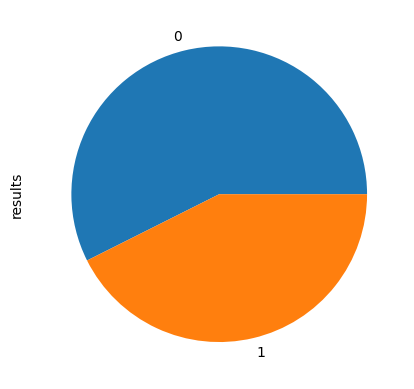

In [161]:
res.plot(kind='pie')

In [162]:
#  I conclude that Accuracy of Logistic Regression because of 100% Accuracy.   
#     Accuracy of DecisionTree Classifier :76.71641791044776
#     Accuracy of RandomForestClassifier :82.68656716417911
#     Accuracy of Logistic Regression Classifier :100.0



    


